In [92]:
from scipy import *
from numpy import *
import operator
from os import listdir
from array import array

In [93]:
def createDataSet():
        group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
        labels = ['A','A','B','B']
        return group, labels

def classify0(inX, dataSet, labels, k):

        # Distance Calculation
        dataSetSize = dataSet.shape[0]

        diffMat = tile(inX, (dataSetSize,1)) - dataSet

        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances**0.5
        sortedDistIndicies = distances.argsort()     
        classCount={}    

        # Vointing with lowest K Distance 
        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

        # Sort Dictionary     
        sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)

        return sortedClassCount[0][0]

In [ ]:
import kNN
group, labels = kNN.createDataSet()
print = kNN.classify0([1.0,1.1], group , labels, 3)

C:\Users\msabe\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


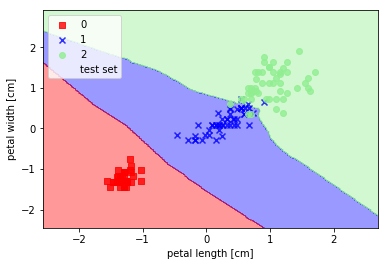

In [100]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()